In [51]:
import pandas as pd
from google.colab import drive
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

def plot_confus(pred_lable, truelable):
  print(metrics.classification_report(pred_lable, truelable))
  print('Accuracy: ',metrics.accuracy_score(truelable, pred_lable))
  mat = confusion_matrix(truelable, pred_lable, labels=np.unique(truelable))
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="YlGnBu")
  tick_marks = np.arange(len(np.unique(truelable)))
  plt.xticks(tick_marks, np.unique(truelable))
  plt.yticks(tick_marks, np.unique(truelable))
  plt.xlabel('true label')
  plt.ylabel('predicted label'); 

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(4,4))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor")

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
# face2_01 = pd.read_csv('drive/MyDrive/file2/result/face2_01_KARNMAY_P1.csv')[['done', 'rasnetmark']]
# face2_02 = pd.read_csv('drive/MyDrive/file2/result/face2_02_Kemisara_P1.csv')[['done', 'rasnetmark']]
# face5_01 = pd.read_csv('drive/MyDrive/file2/result/face5_01_jaysbabyfood_P1.csv')[['done', 'rasnetmark']]
# face5_02 = pd.read_csv('drive/MyDrive/file2/result/face5_02_gssspotted_P1.csv')[['done', 'rasnetmark']]
# face5_03 = pd.read_csv('drive/MyDrive/file2/result/face5_03_clubfriday_P1.csv')[['done', 'rasnetmark']]
# face6_01 = pd.read_csv('drive/MyDrive/file2/result/face6_01_mintchyy_ep2_P1.csv')[['done', 'rasnetmark']]
# face6_02 = pd.read_csv('drive/MyDrive/file2/result/face6_02_Babyjingko_P1.csv')[['done', 'rasnetmark']]
# face7_01 = pd.read_csv('drive/MyDrive/file2/result/face7_01_mintchyy_QA_100_P1.csv')[['done', 'rasnetmark']]
# face7_2_01 = pd.read_csv('drive/MyDrive/file2/result/face7_2_01_thematter_P1.csv')[['done', 'rasnetmark']]
# d = {'face2_01':face2_01, 'face2_02':face2_02, 'face5_01':face5_01, 'face5_02':face5_02,
#           'face5_03':face5_03, 'face6_01':face6_01, 'face6_02':face6_02, 'face7_01':face7_01,
#           'face7_2_01':face7_2_01}

# for key, value in d.items():
#   print(key, ' = ', value.columns.values)

face2_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face2_01_KARNMAY_FERG_DB_256.csv')[['done', 'label']]
face2_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face2_02_Kemisara_FERG_DB_256.csv')[['done', 'label']]
face5_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_01_jaysbabyfood_FERG_DB_256.csv')[['done', 'label']]
face5_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_02_gssspotted_FERG_DB_256.csv')[['done', 'label']]
face5_03 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face5_03_clubfriday_FERG_DB_256.csv')[['done', 'label']]
face6_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face6_01_mintchyy_ep2_FERG_DB_256.csv')[['done', 'label']]
face6_02 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face6_02_Babyjingko_FERG_DB_256.csv')[['done', 'label']]
face7_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face7_01_mintchyy_QA_100_FERG_DB_256.csv')[['done', 'label']]
face7_2_01 = pd.read_csv('drive/MyDrive/file2/result/model_FERG_DB_256/done/face7_2_01_thematter_FERG_DB_256.csv')[['done', 'label']]

d = {'face2_01':face2_01, 'face2_02':face2_02, 'face5_01':face5_01, 'face5_02':face5_02,
          'face5_03':face5_03, 'face6_01':face6_01, 'face6_02':face6_02, 'face7_01':face7_01,
          'face7_2_01':face7_2_01}

for key, value in d.items():
  print(key, ' = ', value.columns.values)

face2_01  =  ['done' 'label']
face2_02  =  ['done' 'label']
face5_01  =  ['done' 'label']
face5_02  =  ['done' 'label']
face5_03  =  ['done' 'label']
face6_01  =  ['done' 'label']
face6_02  =  ['done' 'label']
face7_01  =  ['done' 'label']
face7_2_01  =  ['done' 'label']


In [53]:
ls 'drive/MyDrive/file2/result/model_FERG_DB_256/done'

face2_01_KARNMAY_FERG_DB_256.csv       face5_03_clubfriday_FERG_DB_256.csv
face2_01_KARNMAY_FERG_DB_256.gsheet    face6_01_mintchyy_ep2_FERG_DB_256.csv
face2_02_Kemisara_FERG_DB_256.csv      face6_02_Babyjingko_FERG_DB_256.csv
face5_01_jaysbabyfood_FERG_DB_256.csv  face7_01_mintchyy_QA_100_FERG_DB_256.csv
face5_02_gssspotted_FERG_DB_256.csv    face7_2_01_thematter_FERG_DB_256.csv


In [54]:
# dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'relax', 'เครียด':'stress', 'เศร้า':'sad',
#          'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'relax',
#          'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'relax',
#          'มีตวามสุข':'happy', 'โกรธ ':'stress'}

dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'neutral', 'เครียด':'stress', 'เศร้า':'sad',
         'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'neutral',
         'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'neutral',
         'มีตวามสุข':'happy', 'โกรธ ':'stress', ' มีความสุข':'happy'}

# dictT = {'Neutral':'neutral', 'มีความสุข':'happy', 'ผ่อนคลาย':'happy', 'เครียด':'stress', 'เศร้า':'sad',
#          'มีความสุช':'happy', 'โกรธ':'stress', 'มีความสุุข':'happy', 'มีความสูข':'happy', 'ผ่่อนคลาย':'happy',
#          'ตื่นเต้น':'happy', 'ประหลาดใจ':'neutral', 'จริงจัง':'stress', 'neutral ': 'neutral', 'ผ่อ่นคลาย':'happy',
#          'มีตวามสุข':'happy', 'โกรธ ':'stress', ' มีความสุข':'happy'}

# model_FERG_DB_256 = {0: 'angry', 1: 'happy', 2: 'neutral', 3: 'sad'}
model_FERG_DB_256 = {0: 'stress', 1: 'happy', 2: 'neutral', 3: 'sad'}

# dic_resmask =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral', 9:'neutral', 17:'neutral', 12:'neutral', 24:'neutral', 33:'neutral', 16:'neutral', 14:'neutral', 13:'neutral'}
# dic_resmask =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral', 'None':'nan', 'none':'nan'}
# dic_resmask_float =  {0:'stress',1:'stress', 2:'stress', 3:'happy',4:'sad',	5:'happy',6:'neutral'}

for key, value in d.items():
  value['done'] = value['done'].replace(dictT) 
  value['label'] = value['label'].replace(model_FERG_DB_256) 

In [55]:
pd.unique(face5_01['label'])

array(['happy', 'neutral', 'sad'], dtype=object)

########### face2_01 ################
              precision    recall  f1-score   support

       happy       1.00      0.21      0.34       150
     neutral       0.02      1.00      0.03         1
         sad       0.00      0.00      0.00         0
      stress       0.02      1.00      0.04         1

    accuracy                           0.22       152
   macro avg       0.26      0.55      0.10       152
weighted avg       0.99      0.22      0.34       152

Accuracy:  0.21710526315789475


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


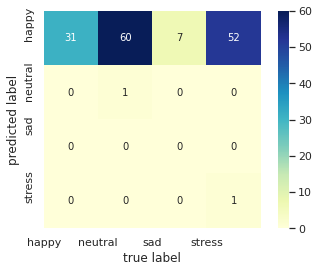


########### face2_02 ################
              precision    recall  f1-score   support

       happy       0.88      0.54      0.67        52
     neutral       0.42      0.64      0.51        22
      stress       0.00      0.00      0.00         0

    accuracy                           0.57        74
   macro avg       0.43      0.39      0.39        74
weighted avg       0.74      0.57      0.62        74

Accuracy:  0.5675675675675675


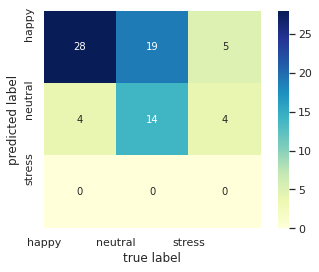


########### face5_01 ################
              precision    recall  f1-score   support

       happy       0.79      0.13      0.22       117
     neutral       0.18      0.32      0.23        34
         sad       0.00      0.00      0.00         3
      stress       0.00      0.00      0.00         0

    accuracy                           0.17       154
   macro avg       0.24      0.11      0.11       154
weighted avg       0.64      0.17      0.22       154

Accuracy:  0.16883116883116883


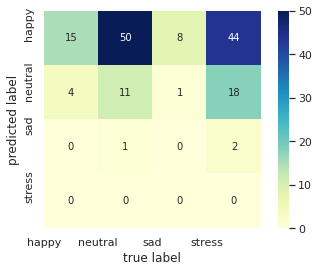


########### face5_02 ################
              precision    recall  f1-score   support

       happy       0.55      0.42      0.48        38
     neutral       0.14      0.80      0.24         5
      stress       0.71      0.34      0.47        29

    accuracy                           0.42        72
   macro avg       0.47      0.52      0.39        72
weighted avg       0.59      0.42      0.46        72

Accuracy:  0.4166666666666667


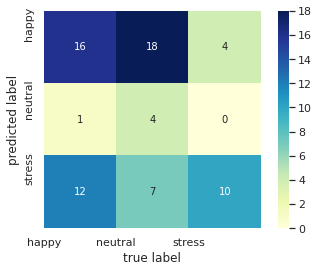


########### face5_03 ################
              precision    recall  f1-score   support

     neutral       0.00      0.00      0.00         4
         sad       0.00      0.00      0.00         0
      stress       0.50      1.00      0.67         1

    accuracy                           0.20         5
   macro avg       0.17      0.33      0.22         5
weighted avg       0.10      0.20      0.13         5

Accuracy:  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


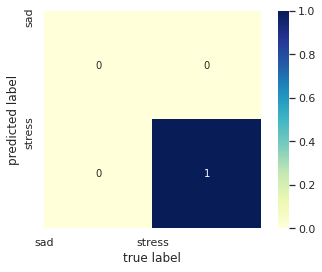


########### face6_01 ################
              precision    recall  f1-score   support

       happy       0.68      0.57      0.62        40
     neutral       0.58      0.56      0.57        54
         sad       0.00      0.00      0.00         0
      stress       0.20      0.29      0.24        14

    accuracy                           0.53       108
   macro avg       0.36      0.35      0.36       108
weighted avg       0.56      0.53      0.54       108

Accuracy:  0.5277777777777778


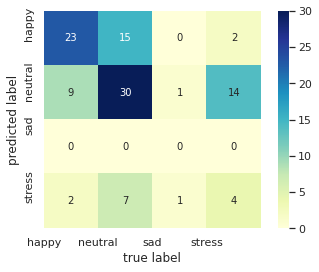


########### face6_02 ################
              precision    recall  f1-score   support

       happy       0.96      0.21      0.34       207
     neutral       0.09      0.63      0.16        19
         sad       0.00      0.00      0.00         0
      stress       0.00      0.00      0.00         2

    accuracy                           0.24       228
   macro avg       0.26      0.21      0.13       228
weighted avg       0.88      0.24      0.32       228

Accuracy:  0.2412280701754386


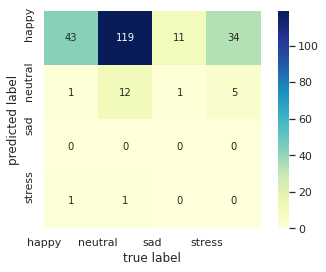


########### face7_01 ################
              precision    recall  f1-score   support

       happy       0.92      0.31      0.46       153
     neutral       0.30      0.57      0.39        54
      stress       0.04      0.50      0.07         4

    accuracy                           0.38       211
   macro avg       0.42      0.46      0.31       211
weighted avg       0.75      0.38      0.44       211

Accuracy:  0.3791469194312796


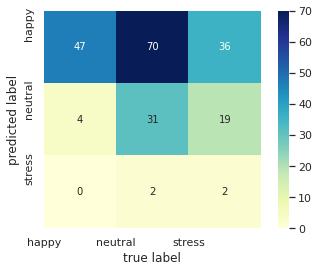


########### face7_2_01 ################
              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Accuracy:  1.0


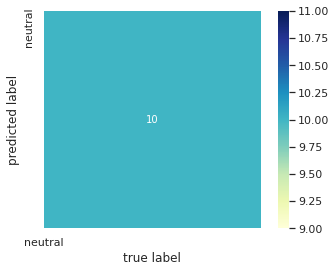

In [56]:
for key, value in d.items():
  print('###########',key,'################')
  plot_confus(value['label'], value['done'])
  # plot_confusion_matrix(value['done'], value['rasnetmark'], classes=pd.unique(dfname['done']),
  #                       normalize=False, title='Normalized Confusion Matrix')
  plt.show()
  print()